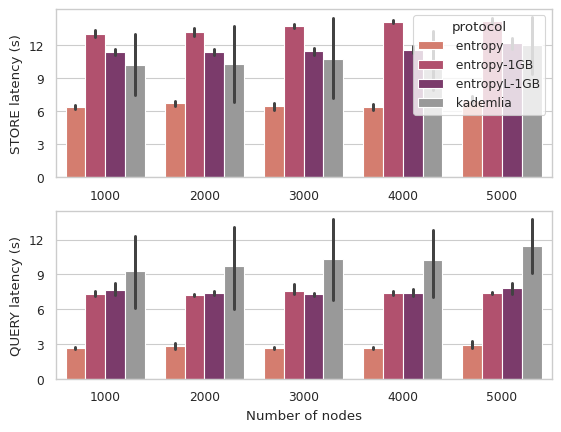

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
sns.set_theme(context='paper', style='whitegrid')

latency = pd.concat([
    pd.read_csv('data/EntropyLatency.txt'),
    pd.read_csv('data/KadLatency.txt'),
]).reset_index()
# print(latency.info())

fig, axs = plt.subplots(2)
palette = dict(zip([' entropy', ' entropy-1GB', ' entropyL-1GB'], sns.color_palette('flare', n_colors=3)))
palette[' kademlia'] = '0.6'
g = sns.barplot(ax=axs[0], data=latency, x='#peer', y='put', hue='protocol',
    palette=palette)
g.set(xlabel='', ylabel='STORE latency (s)')
g.set_yticks(list(range(0, 14, 3)))
g.axes.xaxis.set_major_formatter(FuncFormatter(lambda x, _: (int(x) + 1) * 1000))
sns.move_legend(g, 'upper right')

g = sns.barplot(ax=axs[1], data=latency, x='#peer', y='get', hue='protocol',
    palette=palette)
g.set(xlabel='Number of nodes', ylabel='QUERY latency (s)')
g.set_yticks(list(range(0, 14, 3)))
g.axes.xaxis.set_major_formatter(FuncFormatter(lambda x, _: (int(x) + 1) * 1000))
g.legend([], [], frameon=False)
